In [25]:
import pandas as pd

df = pd.read_csv('Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


<Axes: xlabel='airline'>

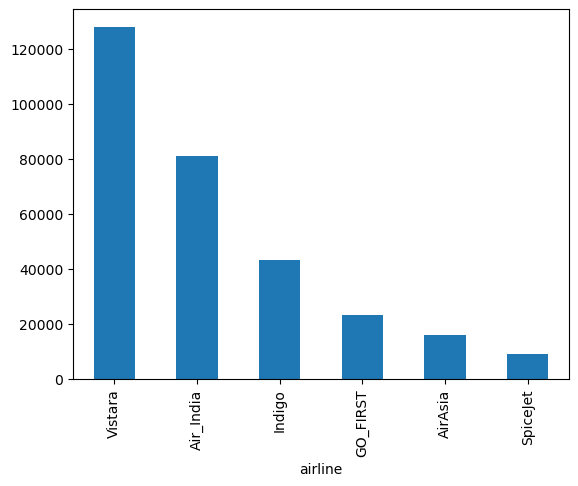

In [26]:
df.airline.value_counts()
df.airline.value_counts().plot(kind='bar')

<Axes: xlabel='duration'>

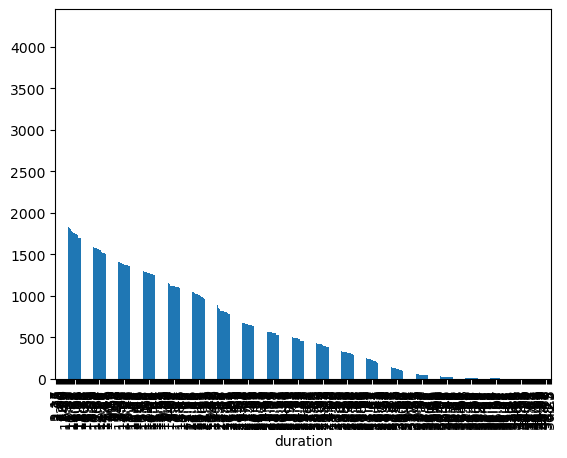

In [27]:
df.duration.value_counts().plot(kind='bar')

In [28]:
df.source_city.value_counts()


source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [29]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [30]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [31]:
df['duration'].value_counts()

duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: count, Length: 476, dtype: int64

In [32]:
print('Median', df['duration'].median())
print('Mean', df['duration'].mean())
print('Mode', df['duration'].mode())

Median 11.25
Mean 12.221020812718846
Mode 0    2.17
Name: duration, dtype: float64


## Preprocessing

In [33]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].replace('Economy', 0)
df['class'] = df['class'].replace('Business', 1)

# OR

# df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)



/var/folders/7q/tklnpyzn627dh58yxzs3qs140000gn/T/ipykernel_29956/433728613.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace('Business', 1)


In [34]:
df.stops = pd.factorize(df.stops)[0]
df.stops

0         0
1         0
2         0
3         0
4         0
         ..
300148    1
300149    1
300150    1
300151    1
300152    1
Name: stops, Length: 300153, dtype: int64

In [35]:
arlines_table = pd.get_dummies(df['airline'], prefix='airline')
df = df.join(arlines_table)
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,False,False,False,False,True,False
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,False,False,False,False,True,False
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,True,False,False,False,False,False
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,False,False,False,False,False,True
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265,False,False,False,False,False,True
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105,False,False,False,False,False,True
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099,False,False,False,False,False,True
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585,False,False,False,False,False,True


In [36]:
df = df.drop('airline', axis=1)

In [37]:
df

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,False,False,False,False,True,False
1,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,False,False,False,False,True,False
2,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,True,False,False,False,False,False
3,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,False,False,False,False,False,True
4,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265,False,False,False,False,False,True
300149,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105,False,False,False,False,False,True
300150,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099,False,False,False,False,False,True
300151,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585,False,False,False,False,False,True


In [38]:
df = df.join(pd.get_dummies(df['source_city'], prefix='source')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df['destination_city'], prefix='dest')).drop('destination_city', axis=1)

In [39]:
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time', axis=1)
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


In [41]:
df.replace({True: 1, False: 0}, inplace=True)
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## Training Regression Model

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [44]:
X, y = df.drop('price', axis=1), df.price
X

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [45]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [49]:
reg.score(X_test, y_test)

0.9849023172081848

In [51]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.9849023172081848
Mean Absolute Error: 1082.2679491149509
Mean Squared Error: 7836441.292443556
Root Mean Squared Error: 2799.364444377251


Text(0.5, 1.0, 'Actual vs Predicted Flight Price')

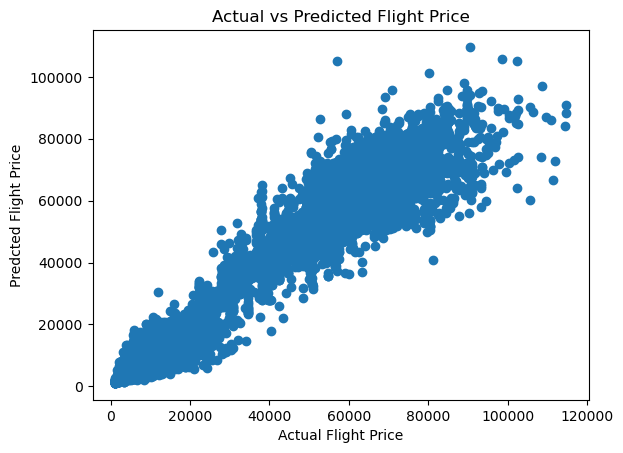

In [52]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predcted Flight Price')
plt.title('Actual vs Predicted Flight Price')

In [53]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [55]:
important_features = {}
for idx, val in enumerate(reg.feature_importances_):
    important_features[X.columns[idx]] = val

important_features = dict(sorted(important_features.items(), key=lambda x: x[1], reverse=True))

print(f'5 most important features: {list(important_features.keys())[:5]}')

5 most important features: ['class', 'duration', 'days_left', 'airline_Air_India', 'airline_Vistara']


In [56]:
importantces = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importantces.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.8799068297010696),
 ('duration', 0.05733713116714126),
 ('days_left', 0.018654902427453945),
 ('airline_Air_India', 0.005131665147493149),
 ('airline_Vistara', 0.004978215100699589),
 ('source_Delhi', 0.0036849337907903876),
 ('dest_Delhi', 0.0033509843037973935),
 ('source_Mumbai', 0.002250437982007143),
 ('dest_Mumbai', 0.0019716373168561143),
 ('dest_Kolkata', 0.0017841855488777627),
 ('stops', 0.0017655064565956832),
 ('source_Kolkata', 0.0017401544512830958),
 ('dest_Hyderabad', 0.0015936605852472593),
 ('arrival_Evening', 0.0015693978845430128),
 ('source_Hyderabad', 0.0012540203294603414),
 ('dest_Bangalore', 0.0012112255205733063),
 ('departure_Evening', 0.0011334240951403124),
 ('arrival_Night', 0.0011263997477873626),
 ('source_Bangalore', 0.0010550680705857021),
 ('arrival_Afternoon', 0.0010182388976911958),
 ('source_Chennai', 0.0009380154650367484),
 ('departure_Morning', 0.0009196085563450394),
 ('dest_Chennai', 0.0008957706483130409),
 ('departure_Afternoon'

<BarContainer object of 10 artists>

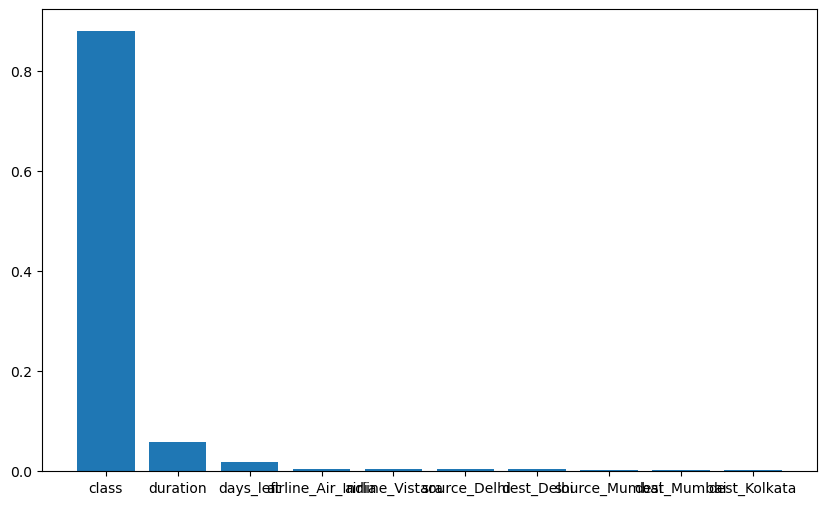

In [58]:
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

In [ ]:
from sklearn.model_selection import GridSearchCV

# Param1: A, B, C
# Param2: X, Y, Z

# AX, AY, AZ, BX, BY, BZ, CX, CY, CZ

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

